<a href="https://colab.research.google.com/github/AlexdeLuna79/Datamining/blob/main/KNN_Practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Link de descarga: https://www.kaggle.com/rakeshrau/social-network-ads

**Social Network Ads**

A categorical dataset to determine whether a user purchased a particular product

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
dataset=pd.read_csv('Social_Network_Ads.csv')

In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
dataset.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
x=dataset.iloc[:,[2,3]].values

In [ ]:
y=dataset.iloc[:,4].values

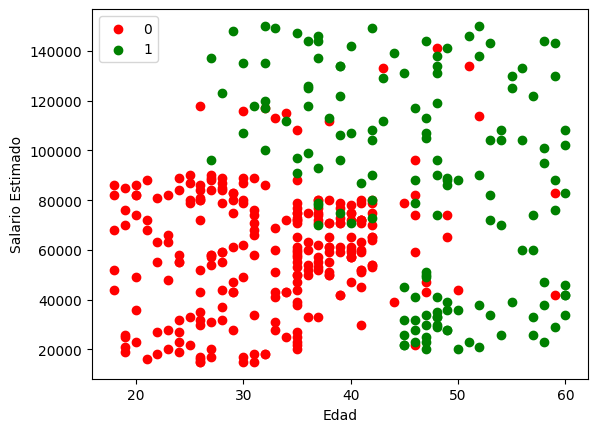

In [ ]:
plt.scatter(x[y==0,0],x[y==0,1],c = 'r', label='0')
plt.scatter(x[y==1,0],x[y==1,1],c = 'g', label='1')
plt.legend()
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

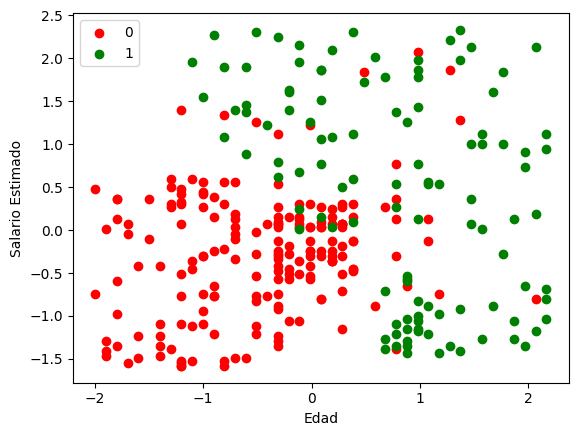

In [ ]:
plt.scatter(x_train[y_train==0,0],x_train[y_train==0,1],c = 'r', label='0')
plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1],c = 'g', label='1')
plt.legend()
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_train=knn.predict(x_train)

In [ ]:
score=knn.score(x_train,y_train)
print(score)

0.91


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred_train)
print(cm)

[[172  17]
 [ 10 101]]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       189
           1       0.86      0.91      0.88       111

    accuracy                           0.91       300
   macro avg       0.90      0.91      0.90       300
weighted avg       0.91      0.91      0.91       300



<ipython-input-24-a3720e055d47>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], alpha=0.5,


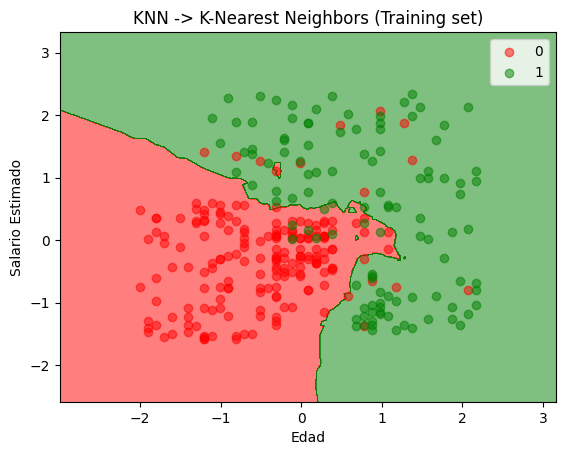

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], alpha=0.5,
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN -> K-Nearest Neighbors (Training set)')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


<ipython-input-27-9d0c0d9efca2>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], alpha=0.5,


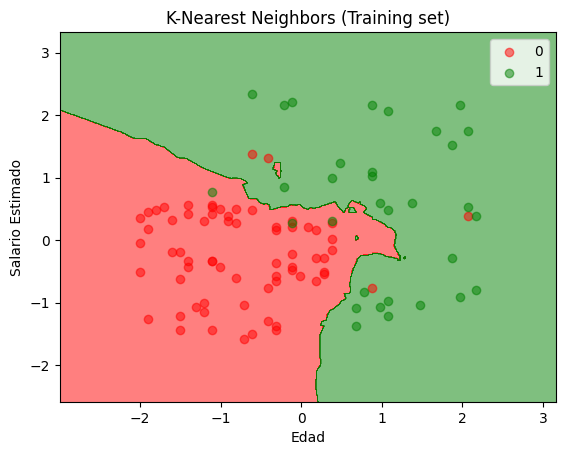

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], alpha=0.5,
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-Nearest Neighbors (Training set)')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()

In [ ]:
print(accuracy_score(y_test, y_pred))

0.93


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [ ]:
x_test[1]

array([-0.01254409, -0.5677824 ])

In [ ]:
prueba=np.array([60,20000])

In [ ]:
prueba.shape

(2,)

In [ ]:
prueba

array([   60, 20000])

In [ ]:
x_prueba=sc.transform(prueba.reshape(-1,2))

In [ ]:
x_prueba

array([[ 2.1661655 , -1.43757673]])

In [ ]:
y_pred_prueba = knn.predict(x_prueba)
print(y_pred_prueba)

[1]
